In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Combine 12 month data
def concat_df():
    df = pd.read_csv('data/201601.csv')
    for num in range(2, 13):
        if num < 10:
            temp = pd.read_csv("data/20160"+str(num)+".csv")
        else:
            temp = pd.read_csv("data/2016"+str(num)+".csv")
        df = pd.concat([df, temp])
    return df

In [3]:
df = concat_df()

#fill missing value with 0
df.fillna(0, inplace=True)

In [4]:
df.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_WEEK', u'FL_DATE', u'CARRIER', u'FL_NUM',
       u'ORIGIN', u'DEST', u'DEP_TIME', u'ARR_TIME', u'ARR_DELAY_NEW',
       u'ACTUAL_ELAPSED_TIME', u'AIR_TIME', u'FLIGHTS', u'DISTANCE',
       u'DISTANCE_GROUP', u'Unnamed: 16'],
      dtype='object')

In [5]:
len(df.CARRIER.unique())

12

In [6]:
len(df.ORIGIN.unique())

313

In [7]:
len(df.DEST.unique())

310

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5617658.0,2016.000000,0.000000,2016.0,2016.0,2016.0,2016.0,2016.0
MONTH,5617658.0,6.535810,3.400847,1.0,4.0,7.0,9.0,12.0
DAY_OF_WEEK,5617658.0,3.933906,1.985502,1.0,2.0,4.0,6.0,7.0
FL_NUM,5617658.0,2078.519748,1700.416510,1.0,711.0,1639.0,2855.0,8402.0
DEP_TIME,5617658.0,1318.575864,519.163335,0.0,907.0,1322.0,1740.0,2400.0
ARR_TIME,5617658.0,1453.797934,555.212867,0.0,1043.0,1504.0,1915.0,2400.0
ARR_DELAY_NEW,5617658.0,11.679572,38.117639,0.0,0.0,0.0,6.0,2142.0
ACTUAL_ELAPSED_TIME,5617658.0,138.176936,76.928250,0.0,82.0,120.0,172.0,778.0
AIR_TIME,5617658.0,114.877469,74.291836,0.0,60.0,96.0,147.0,723.0
FLIGHTS,5617658.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [9]:
#Create label: 1 = delayed, 0 = on-time
df['label'] = df['ARR_DELAY_NEW'].map(lambda x: 1 if x > 0 else 0)

In [10]:
#Percentage of each label class
delay_pec = df.label.value_counts()*1.0/sum(df.label.value_counts())*100.0

# 34% of flight were delayed!
df.label.value_counts()/sum(df.label.value_counts())

0    0.664489
1    0.335511
Name: label, dtype: float64

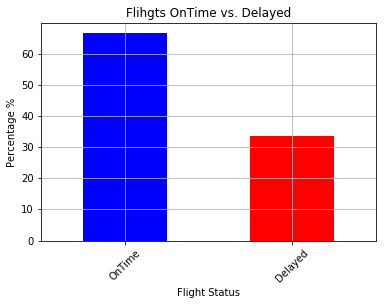

In [11]:
#Percentage graph of Flight Status
status_graph = delay_pec.plot(kind='bar', title='Flihgts OnTime vs. Delayed', color='br', grid=True)
plt.xticks([0,1], ['OnTime','Delayed'], rotation=45)
plt.xlabel("Flight Status")
plt.ylabel("Percentage %")
plt.show()

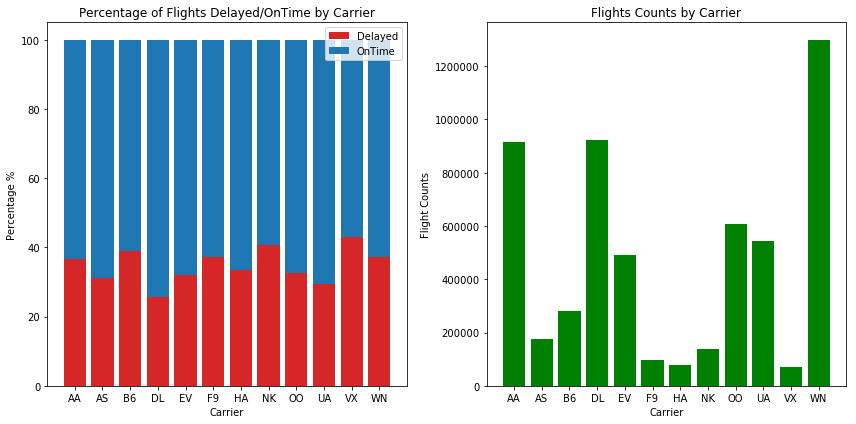

In [12]:
#Graph grouped by Carrier

#Create data source for graph
g_carrier = (df.groupby(['CARRIER', 'label']).count()['YEAR']*100/df.groupby(['CARRIER']).count()['YEAR']).to_frame()
g_carrier.reset_index(level=0, inplace=True)
g_carrier.reset_index(level=0, inplace=True)
g_carrier.columns = ['label', 'CARRIER', 'pec']

plt.figure(figsize=(12,6))

#Percentage of flight status grouped by Carrier
plt.subplot(1,2,1)
#First Bottom graph
carrier_ontime = g_carrier[g_carrier.label == 0]['pec']
#Fist Top graph
carrier_delayed = g_carrier[g_carrier.label == 1]['pec']

N = len(carrier_ontime)
ind = np.arange(N)

p1 = plt.bar(ind, carrier_delayed, color='#d62728')
p2 = plt.bar(ind, carrier_ontime, bottom=carrier_delayed)

plt.title("Percentage of Flights Delayed/OnTime by Carrier")
plt.legend((p1[0], p2[0]), ('Delayed','OnTime'))
plt.ylabel('Percentage %')
plt.xlabel('Carrier')
plt.xticks(ind, list(g_carrier.CARRIER.unique()))

#Flight counts by Carrier
plt.subplot(1,2,2)
carrier_counts = df.groupby(['CARRIER']).count()['YEAR']
N1 = len(carrier_counts)
ind1 = np.arange(N1)
plt.bar(ind1,carrier_counts, color='g')
plt.title("Flights Counts by Carrier")
plt.ylabel('Flight Counts')
plt.xlabel('Carrier')
plt.xticks(ind1, list(g_carrier.CARRIER.unique()))
plt.tight_layout()
plt.show()

/Users/jeewonlee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


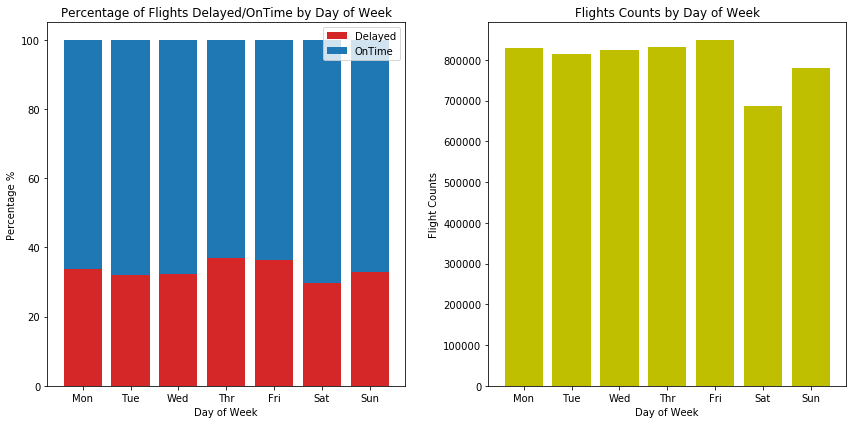

In [13]:
#Graph grouped by DOW

#Create data source for graph
g_dow = (df.groupby(['DAY_OF_WEEK', 'label']).count()['YEAR']*100/df.groupby(['DAY_OF_WEEK']).count()['YEAR']).to_frame()
g_dow.reset_index(level=0, inplace=True)
g_dow.reset_index(level=0, inplace=True)
g_dow.columns = ['label', 'DOW', 'pec']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
#Percentage flight status grouped by DOW
#First Bottom graph
dow_ontime = g_dow[g_dow.label == 0]['pec']
#First Top graph
dow_delayed = g_dow[g_carrier.label == 1]['pec']

N = len(dow_ontime)
ind = np.arange(N)

p1 = plt.bar(ind, dow_delayed, color='#d62728')
p2 = plt.bar(ind, dow_ontime, bottom=dow_delayed)

plt.title("Percentage of Flights Delayed/OnTime by Day of Week")
plt.legend((p1[0], p2[0]), ('Delayed','OnTime'))
plt.ylabel('Percentage %')
plt.xlabel('Day of Week')
plt.xticks(ind, ('Mon','Tue','Wed','Thr','Fri','Sat','Sun'))

#Flight counts by DOW
plt.subplot(1,2,2)
dow_counts = df.groupby(['DAY_OF_WEEK']).count()['YEAR']
N1 = len(dow_counts)
ind1 = np.arange(N1)
plt.bar(ind1,dow_counts, color='y')
plt.title("Flights Counts by Day of Week")
plt.ylabel('Flight Counts')
plt.xlabel('Day of Week')
plt.xticks(ind1, ('Mon','Tue','Wed','Thr','Fri','Sat','Sun'))
plt.tight_layout()
plt.show()

In [14]:
carrier_counts

CARRIER
AA     914495
AS     177280
B6     282473
DL     922746
EV     490990
F9      95121
HA      76789
NK     138199
OO     605933
UA     545067
VX      69121
WN    1299444
Name: YEAR, dtype: int64

In [15]:
# Number of flights per Origin statistics
(df.groupby('ORIGIN').count()['YEAR'].sort_values(ascending=False)).describe().T

count       313.000000
mean      17947.789137
std       43001.429367
min           1.000000
25%         939.000000
50%        2568.000000
75%        9944.000000
max      384375.000000
Name: YEAR, dtype: float64

In [16]:
df.groupby('ORIGIN').count()['YEAR'].sort_values(ascending=False).head(161).tail(3)

ORIGIN
MDT    2549
MRY    2544
MLI    2527
Name: YEAR, dtype: int64

In [17]:
#origin_list total flight counts more than 2500
origin_list = df.groupby('ORIGIN').count()['YEAR'].sort_values(ascending=False).head(161).to_frame().index

In [18]:
origin_list

Index([u'ATL', u'ORD', u'DEN', u'LAX', u'DFW', u'SFO', u'PHX', u'LAS', u'IAH',
       u'SEA',
       ...
       u'EVV', u'MSO', u'AGS', u'BFL', u'ILM', u'TLH', u'CRW', u'MDT', u'MRY',
       u'MLI'],
      dtype='object', name=u'ORIGIN', length=161)

In [19]:
temp = df.copy()
temp['mark'] = temp['ORIGIN'].map(lambda x: x in origin_list)

In [20]:
df_origin_2500 = temp[temp['mark']==True]

In [21]:
df_origin_2500.tail(3)

,YEAR,MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_TIME,ARR_DELAY_NEW,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,Unnamed: 16,label,mark
460946,2016,12,4,2016-12-29,VX,710,SFO,DAL,713.0,1223.0,0.0,190.0,177.0,1.0,1476.0,6,0.0,0,True
460947,2016,12,4,2016-12-29,VX,713,DAL,SFO,757.0,954.0,0.0,237.0,207.0,1.0,1476.0,6,0.0,0,True
460948,2016,12,4,2016-12-29,VX,714,SFO,DAL,1222.0,1742.0,0.0,200.0,177.0,1.0,1476.0,6,0.0,0,True


In [22]:
#Percentage of flight status grouped by Origin

#Create data source for graph
g_origin = (df_origin_2500.groupby(['ORIGIN', 'label']).count()['YEAR']*100/df_origin_2500.groupby(['ORIGIN']).count()['YEAR']).to_frame()
g_origin.reset_index(level=0, inplace=True)
g_origin.reset_index(level=0, inplace=True)
g_origin.columns = ['label', 'ORIGIN', 'pec']

In [23]:
top10_delayed_origin = (g_origin[g_origin.label==1].sort_values('pec', ascending=False)['ORIGIN'].head(10).values)

In [24]:
top10_delayed_origin

array(['OAK', 'DAL', 'LAX', 'MIA', 'HOU', 'DFW', 'SMF', 'LAS', 'SFO', 'ORD'], dtype=object)

In [25]:
temp = df.copy()
temp['mark'] = temp['ORIGIN'].map(lambda x: x in top10_delayed_origin)
df_origin_10 = temp[temp['mark']==True]

In [26]:
g_origin_top10= (df_origin_10.groupby(['ORIGIN', 'label']).count()['YEAR']*100/df_origin_10.groupby(['ORIGIN']).count()['YEAR']).to_frame()
g_origin_top10.reset_index(level=0, inplace=True)
g_origin_top10.reset_index(level=0, inplace=True)
g_origin_top10.columns = ['label', 'ORIGIN', 'pec']

In [27]:
sorted_top10_index = list(g_origin_top10[g_origin_top10.label == 1]['pec'].reset_index(drop=True).argsort().values[::-1])

In [28]:
df_origin_10.groupby(['ORIGIN']).count()['YEAR'].reset_index(drop=True)[sorted_top10_index]

6     48819
0     68963
4    212983
5     69658
2     54202
1    196049
9     41261
3    150686
8    172358
7    244082
Name: YEAR, dtype: int64

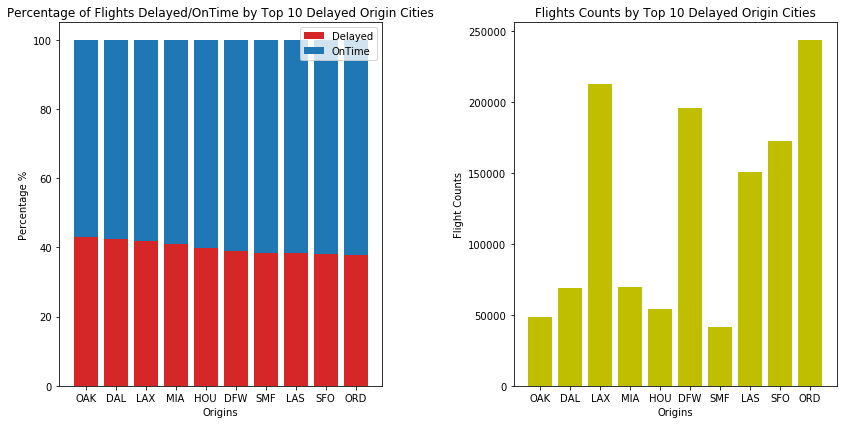

In [29]:
plt.figure(figsize=(12,6))

#Percentage of flight status by Top 10 dealyed origin cities
plt.subplot(1,2,1)
#Bottom graph
origin_top10_ontime = g_origin_top10[g_origin_top10.label == 0]['pec'].reset_index(drop=True)[sorted_top10_index]
#Top graph
origin_top10_delayed = g_origin_top10[g_origin_top10.label == 1]['pec'].reset_index(drop=True)[sorted_top10_index]

N = len(origin_top10_ontime)
ind = np.arange(N)

p1 = plt.bar(ind, origin_top10_delayed, color='#d62728')
p2 = plt.bar(ind, origin_top10_ontime, bottom=origin_top10_delayed)

plt.title("Percentage of Flights Delayed/OnTime by Top 10 Delayed Origin Cities")
plt.legend((p1[0], p2[0]), ('Delayed','OnTime'))
plt.ylabel('Percentage %')
plt.xlabel('Origins')
plt.xticks(ind, list(top10_delayed_origin))

#Flight counts by Top 10 delayed origin cities
plt.subplot(1,2,2)
origin_10_counts = df_origin_10.groupby(['ORIGIN']).count()['YEAR'].reset_index(drop=True)[sorted_top10_index]
N1 = len(origin_10_counts)
ind1 = np.arange(N1)
plt.bar(ind1,origin_10_counts, color='y')
plt.title("Flights Counts by Top 10 Delayed Origin Cities")
plt.ylabel('Flight Counts')
plt.xlabel('Origins')
plt.xticks(ind1, list(top10_delayed_origin))
plt.tight_layout()
plt.show()

In [30]:
df.DEP_TIME.describe().T

count    5.617658e+06
mean     1.318576e+03
std      5.191633e+02
min      0.000000e+00
25%      9.070000e+02
50%      1.322000e+03
75%      1.740000e+03
max      2.400000e+03
Name: DEP_TIME, dtype: float64

In [31]:
#Create departure time group
dep_label = ['00-04','04-08','08-12','12-16','16-20','20-24']
df['DEP_TIME_BINS'] = pd.cut(df.DEP_TIME,[0.0, 400.0, 800.0, 1200.0, 1600.0, 2000.00, 2400.00] ,labels=dep_label)

In [32]:
df.DEP_TIME_BINS.describe().T

count     5554202
unique          6
top         08-12
freq      1348685
Name: DEP_TIME_BINS, dtype: object

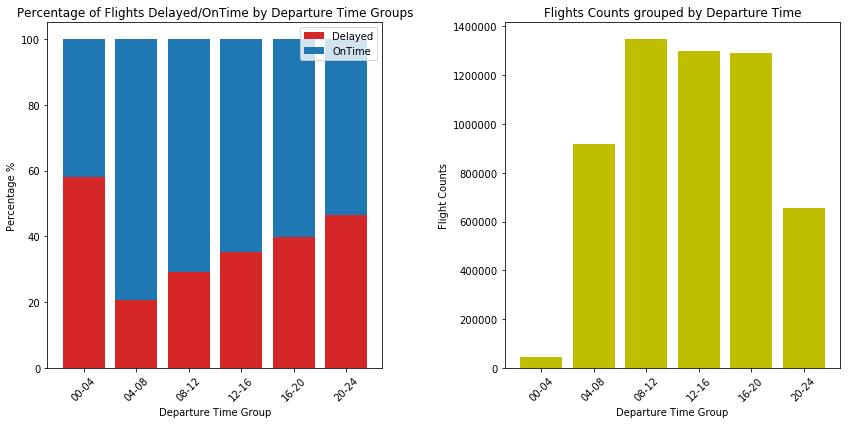

In [33]:
#Graph by Departure Time

g_dep_time= (df.groupby(['DEP_TIME_BINS', 'label']).count()['YEAR']*100/df.groupby(['DEP_TIME_BINS']).count()['YEAR']).to_frame()
g_dep_time.reset_index(level=0, inplace=True)
g_dep_time.reset_index(level=0, inplace=True)
g_dep_time.columns = ['label', 'DEP_TIME_BINS', 'pec']

#Bottom graph
dep_time_ontime = g_dep_time[g_dep_time.label == 0]['pec']
#Top graph
dep_time_delayed = g_dep_time[g_dep_time.label == 1]['pec']

plt.figure(figsize=(12,6))
plt.subplot(121)
N = len(dep_time_ontime)
ind = np.arange(N)
p1 = plt.bar(ind, dep_time_delayed, color='#d62728')
p2 = plt.bar(ind, dep_time_ontime, bottom=dep_time_delayed)

plt.title("Percentage of Flights Delayed/OnTime by Departure Time Groups")
plt.legend((p1[0], p2[0]), ('Delayed','OnTime'))
plt.ylabel('Percentage %')
plt.xlabel('Departure Time Group')
plt.xticks(ind, dep_label, rotation=45)

# Bar group flight counts grouped by Departure Time
plt.subplot(122)
dep_time_counts = df.groupby(['DEP_TIME_BINS']).count()['YEAR']
N1 = len(dep_time_counts)
ind1 = np.arange(N1)
plt.bar(ind1,dep_time_counts, color='y')
plt.title("Flights Counts grouped by Departure Time")
plt.ylabel('Flight Counts')
plt.xlabel('Departure Time Group')
plt.xticks(ind1, dep_label, rotation=45)
plt.tight_layout()
plt.show()

In [34]:
df.DISTANCE_GROUP.describe().T

count    5.617658e+06
mean     3.872194e+00
std      2.436703e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      1.100000e+01
Name: DISTANCE_GROUP, dtype: float64

In [35]:
df.DISTANCE_GROUP.unique()

array([ 8,  3,  7,  4,  1,  2, 10,  5,  6, 11,  9])

In [36]:
distance_group_label = ["Less Than 250 Miles","250-499 Miles","500-749 Miles","750-999 Miles","1000-1249 Miles","1250-1499 Miles","1500-1749 Miles"
,"1750-1999 Miles","2000-2249 Miles","2250-2499 Miles","2500 Miles and Greater"]

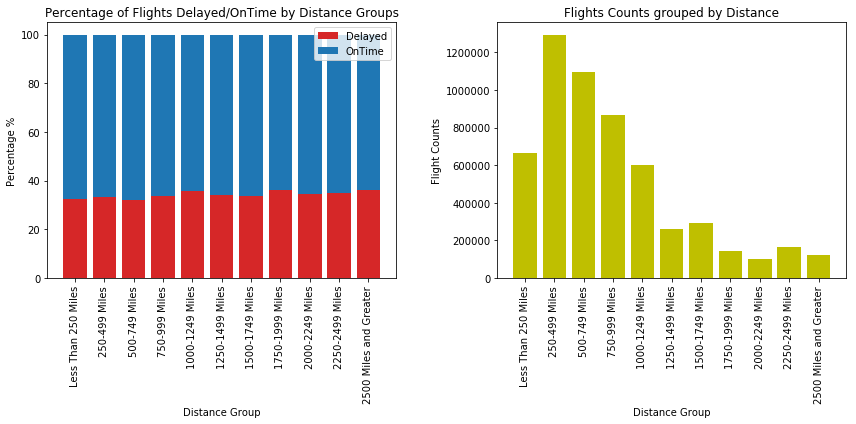

In [37]:
#Graph grouped by Distance

g_distance= (df.groupby(['DISTANCE_GROUP', 'label']).count()['YEAR']*100/df.groupby(['DISTANCE_GROUP']).count()['YEAR']).to_frame()
g_distance.reset_index(level=0, inplace=True)
g_distance.reset_index(level=0, inplace=True)
g_distance.columns = ['label', 'Distance_group', 'pec']

#Bottom graph
distance_ontime = g_distance[g_distance.label == 0]['pec']
#Top graph
distance_delayed = g_distance[g_distance.label == 1]['pec']

plt.figure(figsize=(12,6))
plt.subplot(121)
N = len(distance_ontime)
ind = np.arange(N)
p1 = plt.bar(ind, distance_delayed, color='#d62728')
p2 = plt.bar(ind, distance_ontime, bottom=distance_delayed)

plt.title("Percentage of Flights Delayed/OnTime by Distance Groups")
plt.legend((p1[0], p2[0]), ('Delayed','OnTime'))
plt.ylabel('Percentage %')
plt.xlabel('Distance Group')
plt.xticks(ind, distance_group_label, rotation=90)

# Bar group flight counts grouped by Departure Time
plt.subplot(122)
distance_counts = df.groupby(['DISTANCE_GROUP']).count()['YEAR']
N1 = len(distance_counts)
ind1 = np.arange(N1)
plt.bar(ind1,distance_counts, color='y')
plt.title("Flights Counts grouped by Distance")
plt.ylabel('Flight Counts')
plt.xlabel('Distance Group')
plt.xticks(ind1, distance_group_label, rotation=90)
plt.tight_layout()
plt.show()